<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/tensorflow_withdl/tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf

In [3]:
a = tf.constant([2], name = 'constant_a')
b = tf.constant([3], name = 'constant_b')

In [4]:
a

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>

In [5]:
print(a)

tf.Tensor([2], shape=(1,), dtype=int32)


In [6]:
tf.print(a.numpy()[0])

np.int32(2)


In [7]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    print(c)
    return c


In [8]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    print(c)
    return c


In [9]:
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available: []


In [10]:
Matrix_one=tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])
@tf.function
def mathmul():
  return tf.matmul(Matrix_one,Matrix_two)
mul_operation=mathmul()
print ("Defined using tensorflow function :")
print(mul_operation)

Defined using tensorflow function :
tf.Tensor(
[[13 18]
 [18 25]], shape=(2, 2), dtype=int32)


Operations
---

In [11]:
a=tf.constant([5])
b=tf.constant([8])
c=tf.add(a,b)
d=tf.subtract(a,b)

print ('c =: %s' % c)

print ('d =: %s' % d)

c =: tf.Tensor([13], shape=(1,), dtype=int32)
d =: tf.Tensor([-3], shape=(1,), dtype=int32)


In [12]:
# sigmoid function
tf.nn.sigmoid(tf.constant([0.0]))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

Linear regression
---
* used to decribe the relationship between  two or more variable
* more than one independent variable called multiple linear regression
* equation Y=aX+b y-dependent variable  x -independent variable  b-paramter
* a=slope or gradient b= is the intercept

In [13]:
!pip install grpcio==1.24.3

  Using cached grpcio-1.24.3.tar.gz (14.0 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for grpcio
  Running setup.py clean for grpcio
Failed to build grpcio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (grpcio)


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)


In [15]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

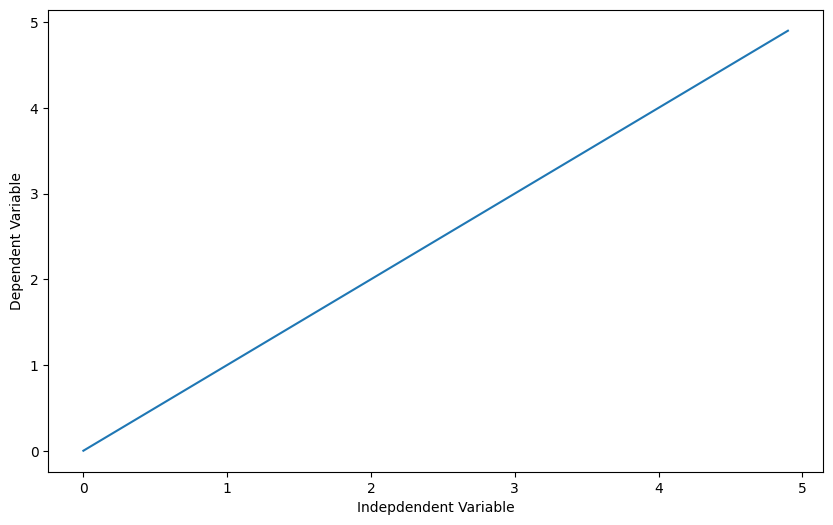

In [20]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Linear Regression with TensorFlow
---

Loading fuel consumption data

In [21]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2025-07-10 15:36:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2025-07-10 15:36:52 (2.25 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [22]:
#loading the data
df=pd.read_csv('FuelConsumption.csv')

In [23]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [24]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [41]:
# we want to predict c02 emission based on the engine
# here  dependent variable is co2 emsision the independent variable is engine
#lets define define X and Y value for the linear regression, that is, train_x and train_y:

In [27]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [42]:
# first we intialize the varaibale a and b  then we define the linear function

In [43]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

In [44]:
# we are going  to define a loss function for our regression  so we can train our model to fit in data
# loss value = (y-y_pred )^2
# tf.reduce_mean() -- this function finds the mean of multidimensional tensor  and the result can have diffr5ent diemsions

In [37]:
def loss_function(y,train_y):
 return tf.reduce_mean(tf.square(y-train_y))

In [45]:
# Gradient Tape to calculate the gradients


In [46]:
learning_rate=0.01
train_data=[]
a_values=[]
b_values=[]
# steps of looping through  all your data to update the parameter
training_epochs=200

In [47]:

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_function(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])

        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

In [48]:
# plotting the loss value to see how its changing during  the training

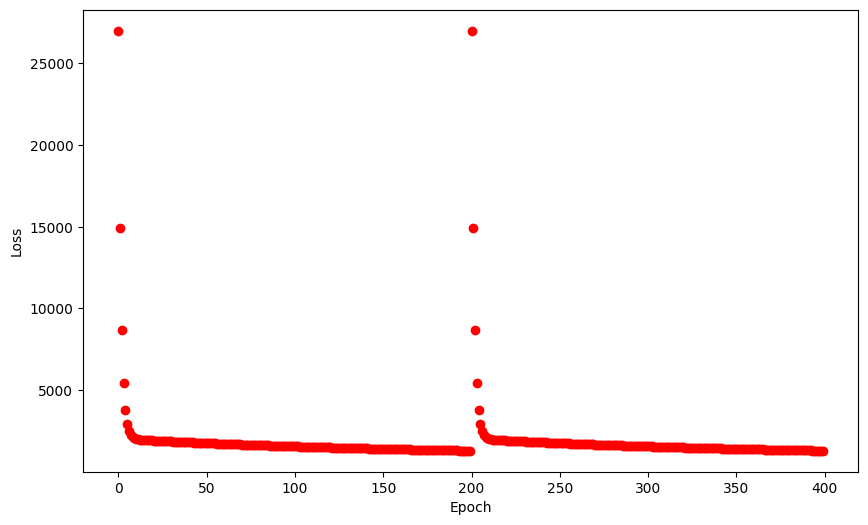

In [49]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

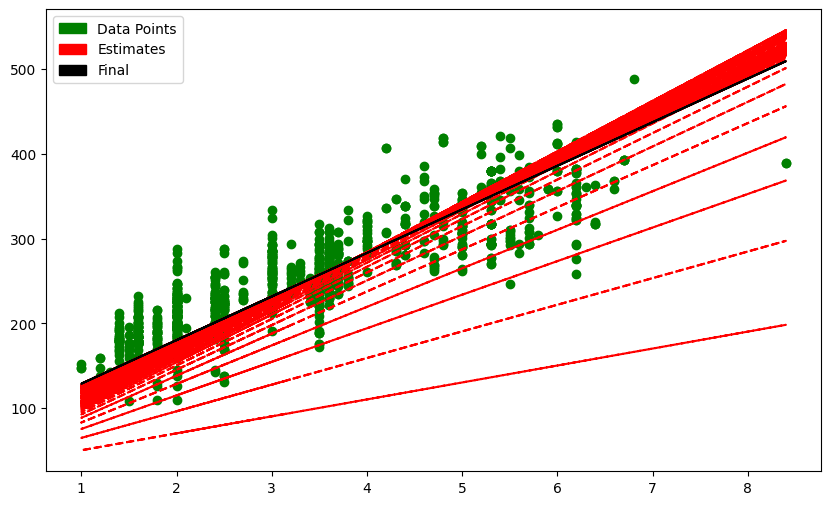

In [50]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()